In [165]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [166]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [167]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,select

In [168]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [169]:
# Declare a Base using automap_base()
Base = automap_base()

In [170]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(autoload_with=engine)


In [171]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [172]:
# Save references to each table
Measurement=Base.classes.measurement
Station = Base.classes.station

In [173]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [174]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

'2017-08-23'

In [175]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
date=session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first().date
date

'2017-08-23'

In [176]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_last=dt.datetime.strptime(date,'%Y-%m-%d')-dt.timedelta(days=365)
year_last


datetime.datetime(2016, 8, 23, 0, 0)

In [178]:
# Perform a query to retrieve the data and precipitation scores
prcp_score=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=year_last).\
    order_by(Measurement.date).all()
prcp_score

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [179]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(prcp_score)
prcp_df.columns=["Date","Precipitation"]
prcp_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [183]:
#fill none values
prcp_df=prcp_df.fillna(0)

In [184]:
# Sort the dataframe by date
dataframe_sorted=prcp_df.sort_values(by="Date")


In [185]:
dataframe_sorted.set_index("Date")

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Inches')

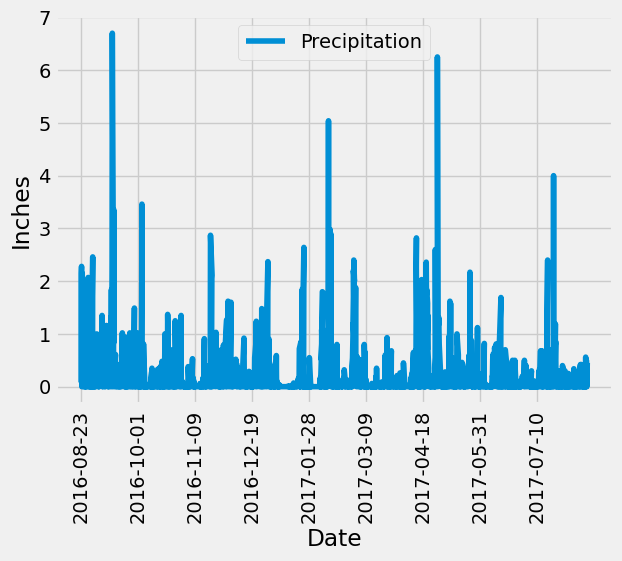

In [186]:
# Use Pandas Plotting with Matplotlib to plot the data
dataframe_sorted.plot().get_figure()
x_label=[0,250,500,750,1000,1250,1500,1750,2000]
x_ticks=["2016-08-23","2016-10-01","2016-11-09","2016-12-19","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
plt.xticks(x_label,x_ticks,rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [187]:
# Use Pandas to calculate the summary statistics for the precipitation data
dataframe_sorted.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [188]:
# Design a query to calculate the total number of stations in the dataset
Number_station=session.query(Station).count()
print(f"There are {Number_station} stations in the dataset")

There are 9 stations in the dataset


In [190]:
locations=session.query(Station)

In [204]:
#list of stations in descending order
most_active_station=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [209]:
#Reference github.com/karikshah
most_active_station_name=""
active_station=most_active_station[0][0]
for location in locations:
    if(location.station==most_active_station[0][0]):
        most_active_station_name=location.name
print(most_active_station_name)

WAIHEE 837.5, HI US


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

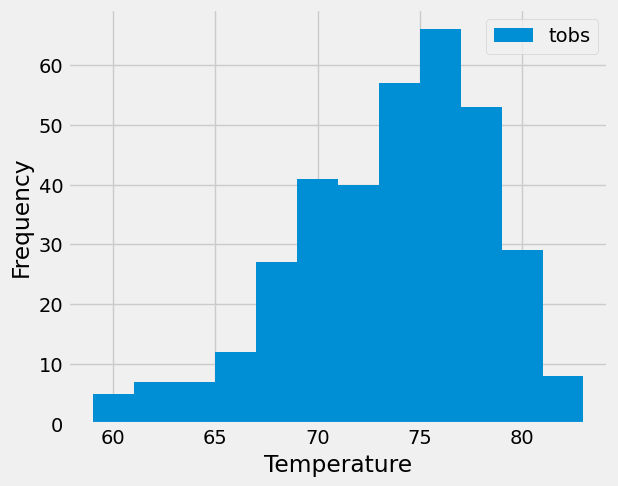

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()